In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('/home/user/Downloads/Bank_Personal_Loan_Modelling.xlsx',sheet_name = 'Data')

In [5]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [7]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
data.shape

(5000, 14)

In [10]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [11]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [12]:
#There are negative values in the experience

data[data['Experience']<0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [31]:
cor = data.corr()
cor

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008262,-0.018038,0.003106,-0.016797,-0.018057,0.021463,-0.017456,-0.024801,-0.006909,-0.006909,-0.006909,-0.006909
Age,-0.008473,1.000000,0.994042,-0.054988,-0.030795,-0.046418,-0.052046,0.041334,-0.012033,-0.007726,0.008043,0.008043,0.008043,0.008043
Experience,-0.008262,0.994042,1.000000,-0.046608,-0.030973,-0.051950,-0.050548,0.014026,-0.011069,-0.008310,0.009731,0.009731,0.009731,0.009731
Income,-0.018038,-0.054988,-0.046608,1.000000,-0.030233,-0.157593,0.637880,-0.187403,0.135018,0.504559,0.170194,0.170194,0.170194,0.170194
ZIP Code,0.003106,-0.030795,-0.030973,-0.030233,1.000000,0.026660,-0.013814,-0.009048,0.005311,-0.002778,0.021801,0.021801,0.021801,0.021801
Family,-0.016797,-0.046418,-0.051950,-0.157593,0.026660,1.000000,-0.103242,0.064929,-0.010862,0.061367,0.014110,0.014110,0.014110,0.014110
CCAvg,-0.018057,-0.052046,-0.050548,0.637880,-0.013814,-0.103242,1.000000,-0.126493,0.068332,0.383308,0.143226,0.143226,0.143226,0.143226
Education,0.021463,0.041334,0.014026,-0.187403,-0.009048,0.064929,-0.126493,1.000000,-0.022005,0.136722,0.013934,0.013934,0.013934,0.013934
Mortgage,-0.017456,-0.012033,-0.011069,0.135018,0.005311,-0.010862,0.068332,-0.022005,1.000000,0.092989,0.069331,0.069331,0.069331,0.069331
Personal Loan,-0.024801,-0.007726,-0.008310,0.504559,-0.002778,0.061367,0.383308,0.136722,0.092989,1.000000,0.316355,0.316355,0.316355,0.316355


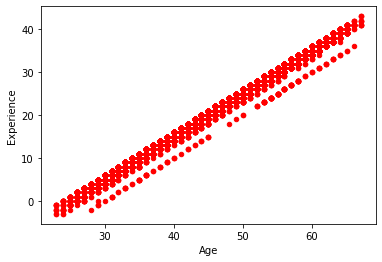

In [14]:
#Age is a factor of experince

data.plot(kind='scatter',x='Age',y='Experience', color='red')
plt.show()

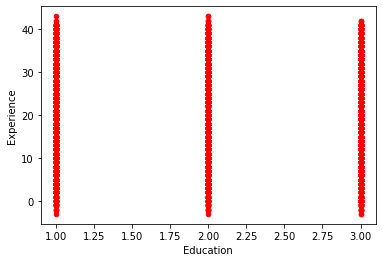

In [15]:
# Education is a factor of experience

data.plot(kind='scatter',x='Education',y='Experience', color='red')
plt.show()

In [16]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [17]:
# Solving the negative values in the experience column

df_Possitive_Experience = data[data['Experience'] > 0]
df_Negative_Experience =  data[data['Experience'] < 0]
df_Negative_Experience_List = df_Negative_Experience['ID'].tolist()

for id in df_Negative_Experience_List:
    age_values = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education_values = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    possitive_Experience_Filtered = df_Possitive_Experience[(df_Possitive_Experience['Age'] == age_values) & (df_Possitive_Experience['Education'] == education_values)]
    if possitive_Experience_Filtered.empty :
        negative_Experience_Filtered = df_Negative_Experience[(df_Negative_Experience['Age'] == age_values) & (df_Negative_Experience['Education'] == education_values)]
        exp = round(negative_Experience_Filtered['Experience'].median())
    else:
        exp = round(possitive_Experience_Filtered['Experience'].median())
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = abs(exp)

In [18]:
#Checking the min of Experience
data['Experience'].describe()

count    5000.000000
mean       20.134800
std        11.414863
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [19]:
# Total records of negative experience
data[data['Experience'] < 0]['Experience'].count()

0

In [20]:
data['Personal Loan'] = data['Personal Loan'].astype(bool)
data['CD Account'] =data['CD Account'].astype(bool)
data['CreditCard'] =data['CD Account'].astype(bool)
data['Online'] =data['CD Account'].astype(bool)
data['Securities Account'] =data['CD Account'].astype(bool)

## Heat map for correlation

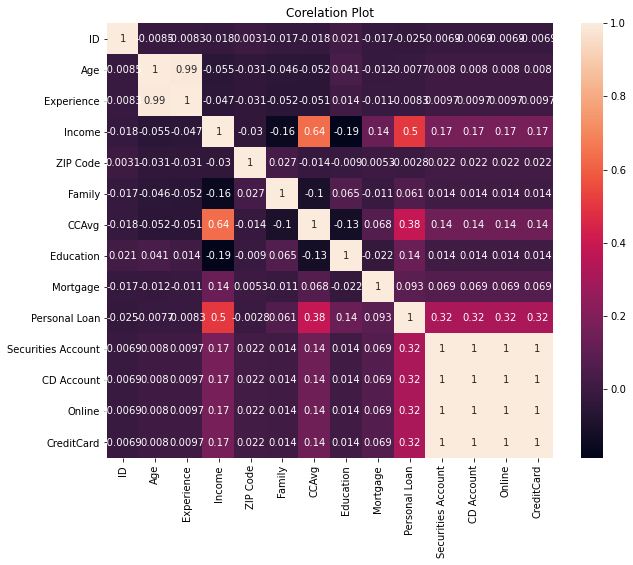

In [32]:
# Heatmap for Corelation:
plt.figure(figsize=(10,8))
plt.title("Corelation Plot")
sns.heatmap(cor,annot=True)
plt.show()

### outer value removal

In [21]:
numcols = data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index

In [23]:
numcols

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage'],
      dtype='object')

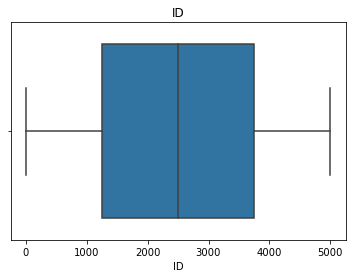

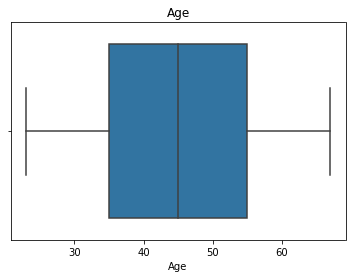

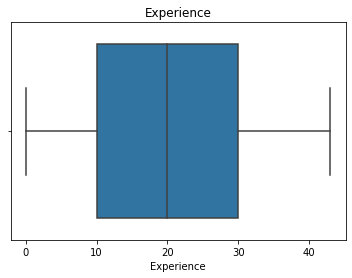

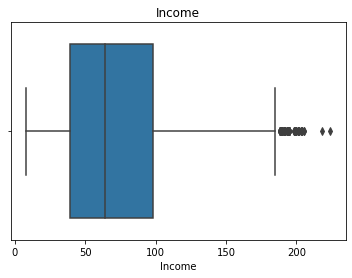

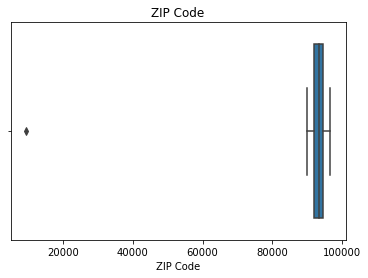

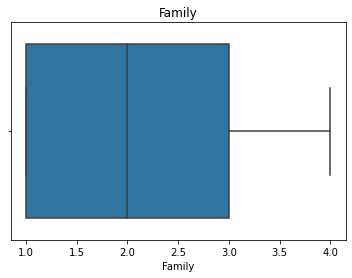

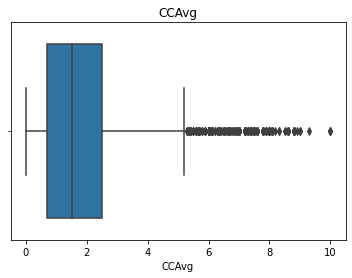

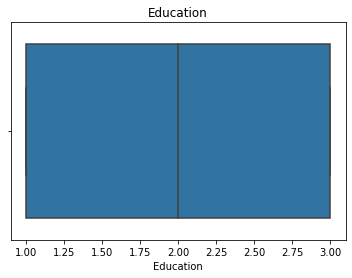

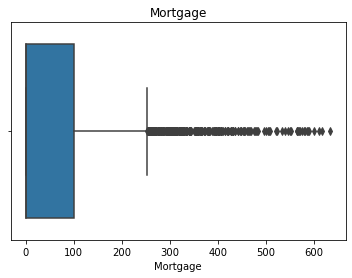

In [24]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [25]:
for x in numcols:
    print(x)
    descr = data[x].describe()
    IQR = descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    lower_limit =  descr['25%'] - 1.5 * IQR  
    #outlier replacement
    data[x][data[x]>upper_limit] = upper_limit
    data[x][data[x]<lower_limit] = lower_limit

ID
Age
Experience
Income
ZIP Code
Family
CCAvg
Education
Mortgage


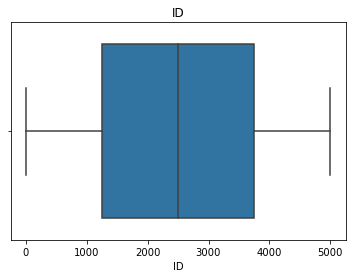

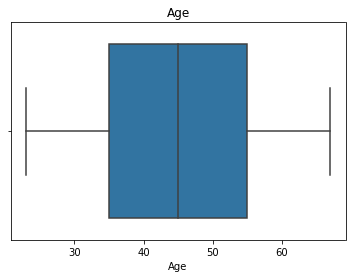

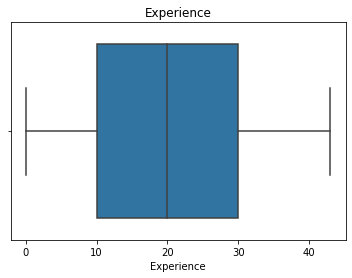

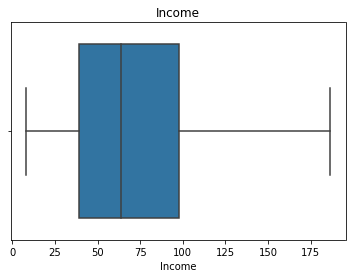

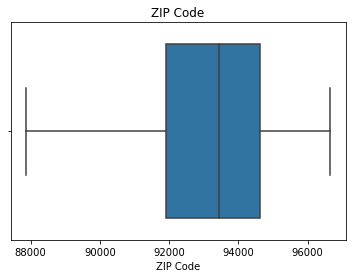

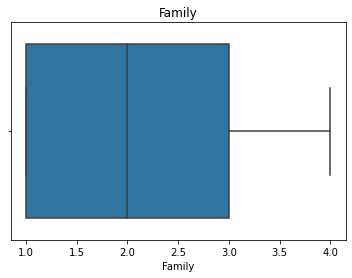

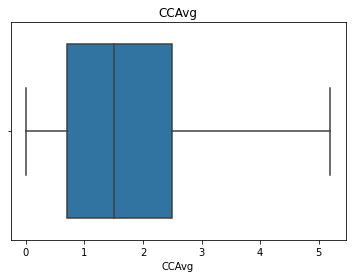

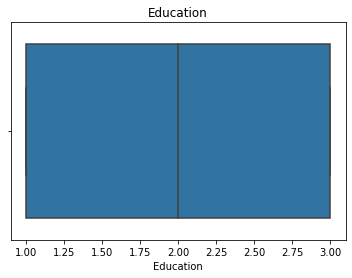

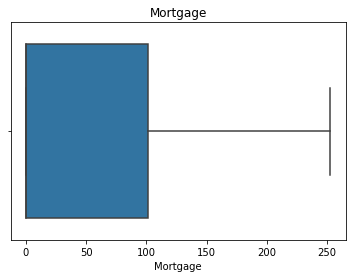

In [26]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [27]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49.0,91107.0,4,1.6,1,0.0,False,False,False,False,False
1,2,45,19,34.0,90089.0,3,1.5,1,0.0,False,False,False,False,False
2,3,39,15,11.0,94720.0,1,1.0,1,0.0,False,False,False,False,False
3,4,35,9,100.0,94112.0,1,2.7,2,0.0,False,False,False,False,False
4,5,35,8,45.0,91330.0,4,1.0,2,0.0,False,False,False,False,False


In [28]:
data.shape

(5000, 14)

## EDA

In [33]:
#Average age of the customer
data['Age'].mean()

45.3384

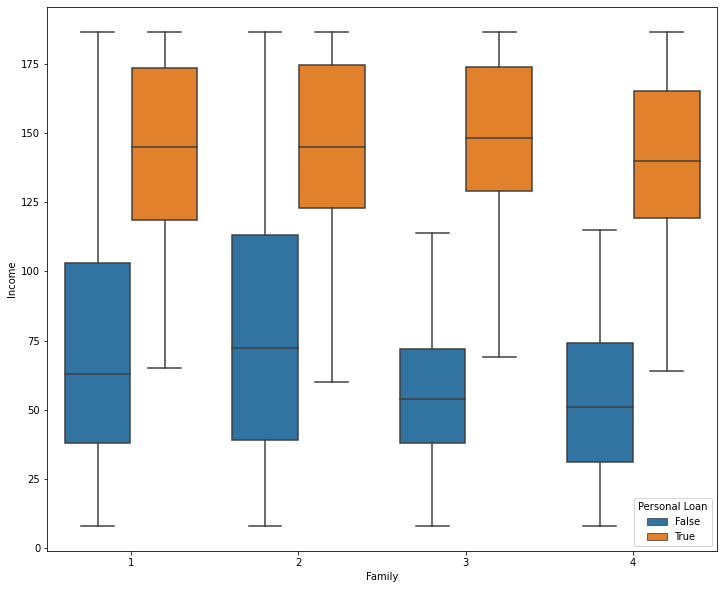

In [48]:
#Which types of customers have opted for personal loan?
plt.figure(figsize=(12,10))
sns.boxplot(x='Family',y='Income',hue='Personal Loan', data=data)
plt.show()

#### People with high Income irrespective of the Family size seems to have opted for Personal Loan

In [49]:
#How many customers have credit card at the age of 60 or above?
data[data['Age']>=60]['CreditCard'].value_counts()

False    631
True      43
Name: CreditCard, dtype: int64

In [50]:
#How many customers have CDaccounts?
data['CD Account'].value_counts()

False    4698
True      302
Name: CD Account, dtype: int64

In [51]:
#percentage of customers use internet banking
online = data['Online'].value_counts()*100/data.shape[0]
print("percentage of customer use netbanking=",online.min(),'%')

percentage of customer use netbanking= 6.04 %


[]

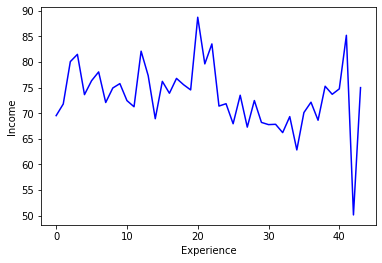

In [61]:
# Average Income of customers as per their experience
exu=data.groupby('Experience')['Income'].mean()
exu.index
sns.lineplot(x=exu.index,y=exu,color='blue')
plt.plot()

In [62]:
#family members.
data.groupby(['Family']).size().sort_values()

Family
3    1010
4    1222
2    1296
1    1472
dtype: int64

In [65]:
#classify the customers with thier experience and ededucation.
Exed = data.groupby(['Experience','Education']).size()
Exed

Experience  Education
0           1            17
            2            20
            3            29
1           1            38
            2            32
                         ..
42          1             2
            2             3
            3             3
43          1             1
            2             2
Length: 131, dtype: int64

<AxesSubplot:xlabel='Personal Loan', ylabel='Income'>

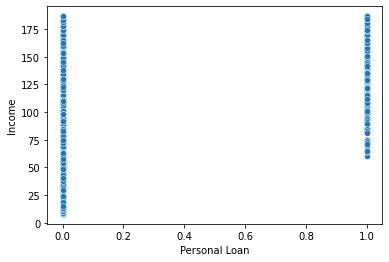

In [74]:
#Who take more loan?
sns.scatterplot(y='Income', x='Personal Loan', data=data)

### People whose Income is between 100 and 200 tend to take loan more compared to ones present in lower income.

In [75]:
#End